In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import math
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy
from scipy.optimize import curve_fit
import ROOT
from root_numpy import fill_hist
from mpl_toolkits.mplot3d import Axes3D

Welcome to JupyROOT 6.24/06


In [2]:
#file_02 = uproot.open("./MuonGun/p2TeV_new.root")
#file_1  = uproot.open("./MuonGun/p1TeV_new_pull.root")
file_1  = uproot.open("./MuonGun/p1TeV_global.root")

In [3]:
file_1.keys()

['Muons;4', 'Muons;3', 'Muons;2']

In [4]:
#tree_02 = file_02["Muons"]
tree_1 = file_1["Muons"]
tree_1.keys()

['isLoose',
 'isTight',
 'isHighPtMuonID',
 'isTrackerHighPtMuonID',
 'pt',
 'pt_err',
 'eta',
 'phi',
 'p',
 'pt_gen',
 'p_gen',
 'deltaR_recogen',
 'nHitsCSC',
 'timeCSC',
 'timeMuon',
 'nSeg',
 'nHits_perSeg',
 'recoSeg_x',
 'recoSeg_y',
 'recoSeg_z',
 'recoSeg_Err_x',
 'recoSeg_Err_y',
 'recoSeg_Err_z',
 'recoSeg_dirx',
 'recoSeg_diry',
 'recoSeg_dirz',
 'recoSeg_Err_dirx',
 'recoSeg_Err_diry',
 'recoSeg_Err_dirz',
 'resSeg',
 'pullSeg',
 'recoHits_x',
 'recoHits_y',
 'recoHits_z',
 'recoHits_xGlobal',
 'recoHits_yGlobal',
 'recoHits_zGlobal',
 'recoHits_Err_x',
 'recoHits_Err_y',
 'recoHits_Err_z',
 'ringID',
 'stationID',
 'chamberID',
 'layerID',
 'zendcapID',
 'simHits_x',
 'simHits_y',
 'simHits_z',
 'simHits_dirx',
 'simHits_diry',
 'simHits_dirz',
 'z_layer',
 'z_layer_check',
 'MUrecoHits_x',
 'MUrecoHits_y',
 'MUrecoHits_z',
 'MUrecoHits_Err_x',
 'MUrecoHits_Err_y',
 'MUrecoHits_Err_z',
 'MUringID',
 'MUstationID',
 'MUchamberID',
 'MUlayerID',
 'MUzendcapID']

In [5]:
#ntupla_02 = tree_02.arrays(tree_02.keys())
ntupla_1 = tree_1.arrays(tree_1.keys())
print(tree_1.keys())

['isLoose', 'isTight', 'isHighPtMuonID', 'isTrackerHighPtMuonID', 'pt', 'pt_err', 'eta', 'phi', 'p', 'pt_gen', 'p_gen', 'deltaR_recogen', 'nHitsCSC', 'timeCSC', 'timeMuon', 'nSeg', 'nHits_perSeg', 'recoSeg_x', 'recoSeg_y', 'recoSeg_z', 'recoSeg_Err_x', 'recoSeg_Err_y', 'recoSeg_Err_z', 'recoSeg_dirx', 'recoSeg_diry', 'recoSeg_dirz', 'recoSeg_Err_dirx', 'recoSeg_Err_diry', 'recoSeg_Err_dirz', 'resSeg', 'pullSeg', 'recoHits_x', 'recoHits_y', 'recoHits_z', 'recoHits_xGlobal', 'recoHits_yGlobal', 'recoHits_zGlobal', 'recoHits_Err_x', 'recoHits_Err_y', 'recoHits_Err_z', 'ringID', 'stationID', 'chamberID', 'layerID', 'zendcapID', 'simHits_x', 'simHits_y', 'simHits_z', 'simHits_dirx', 'simHits_diry', 'simHits_dirz', 'z_layer', 'z_layer_check', 'MUrecoHits_x', 'MUrecoHits_y', 'MUrecoHits_z', 'MUrecoHits_Err_x', 'MUrecoHits_Err_y', 'MUrecoHits_Err_z', 'MUringID', 'MUstationID', 'MUchamberID', 'MUlayerID', 'MUzendcapID']


In [6]:
'''
muons_02 = ak.zip({
            "p"                     : ntupla_02.p,
            "pGen"                  : ntupla_02.p_gen,
            "pt"                    : ntupla_02.pt,
            "ptErr"                 : ntupla_02.pt_err,
            "ptGen"                 : ntupla_02.pt_gen,
            "phi"                   : ntupla_02.phi,
            "eta"                   : ntupla_02.eta,
            "isTight"               : ntupla_02.isTight,
            "isHighPtMuonID"        : ntupla_02.isHighPtMuonID,
            "isTrackerHighPtMuonID" : ntupla_02.isTrackerHighPtMuonID,
            "nSeg"                  : ntupla_02.nSeg
             }, with_name="MuonCandidate02")
'''

muons_1 = ak.zip({
            "p"                     : ntupla_1.p,
            "pGen"                  : ntupla_1.p_gen,
            "pt"                    : ntupla_1.pt,
            "ptErr"                 : ntupla_1.pt_err,
            "ptGen"                 : ntupla_1.pt_gen,
            "phi"                   : ntupla_1.phi,
            "eta"                   : ntupla_1.eta,
            "isTight"               : ntupla_1.isTight,
            "isHighPtMuonID"        : ntupla_1.isHighPtMuonID,
            "isTrackerHighPtMuonID" : ntupla_1.isTrackerHighPtMuonID,
            "nSeg"                  : ntupla_1.nSeg
             }, with_name="MuonCandidate1")

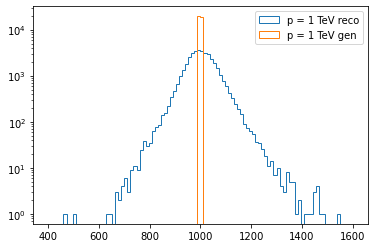

In [7]:
plt.hist(muons_1.p[(muons_1.isTight == 1)],label='p = 1 TeV reco',histtype=("step"), bins=100, range = (400,1600))
plt.hist(muons_1.pGen[(muons_1.isTight == 1)],label='p = 1 TeV gen',histtype=("step"), bins=100, range = (400,1600))
plt.legend(loc='best')
plt.yscale('log')

In [8]:
'''
segments_02 = ak.zip({
                "nHits"              : ntupla_02.nHits_perSeg,
                "x"                  : ntupla_02.recoSeg_x,
                "y"                  : ntupla_02.recoSeg_y,
                "xErr"               : ntupla_02.recoSeg_Err_x,
                "yErr"               : ntupla_02.recoSeg_Err_z,
                "dirx"               : ntupla_02.recoSeg_dirx,
                "diry"               : ntupla_02.recoSeg_diry,
                "dirz"               : ntupla_02.recoSeg_dirz,
                "dirxErr"            : ntupla_02.recoSeg_Err_dirx,
                "diryErr"            : ntupla_02.recoSeg_Err_dirz
                })
'''
segments_1 = ak.zip({
                "nHits"              : ntupla_1.nHits_perSeg,
                "x"                  : ntupla_1.recoSeg_x,
                "y"                  : ntupla_1.recoSeg_y,
                "xErr"               : ntupla_1.recoSeg_Err_x,
                "yErr"               : ntupla_1.recoSeg_Err_z,
                "dirx"               : ntupla_1.recoSeg_dirx,
                "diry"               : ntupla_1.recoSeg_diry,
                "dirz"               : ntupla_1.recoSeg_dirz,
                "dirxErr"            : ntupla_1.recoSeg_Err_dirx,
                "diryErr"            : ntupla_1.recoSeg_Err_dirz,
                "pull"               : ntupla_1.pullSeg,
                "res"                : ntupla_1.resSeg
                })

In [9]:
'''
hits_02 = ak.zip({
                "x"                  : ntupla_02.recoHits_x,
                "y"                  : ntupla_02.recoHits_y,
                "xErr"               : ntupla_02.recoHits_Err_x,
                "yErr"               : ntupla_02.recoHits_Err_z,
                "xSim"               : ntupla_02.simHits_x,
                "ySim"               : ntupla_02.simHits_y,
                "zSim"               : ntupla_02.simHits_z,
                "zLayer"             : ntupla_02.z_layer,
                "ring"               : ntupla_02.ringID,
                "station"            : ntupla_02.stationID,
                "chamber"            : ntupla_02.chamberID,
                "layer"              : ntupla_02.layerID,
                "endcap"             : ntupla_02.zendcapID,
                })
'''
hits_1 = ak.zip({
                "x"                  : ntupla_1.recoHits_x,
                "y"                  : ntupla_1.recoHits_y,
                "xErr"               : ntupla_1.recoHits_Err_x,
                "yErr"               : ntupla_1.recoHits_Err_z,
                "xSim"               : ntupla_1.simHits_x,
                "ySim"               : ntupla_1.simHits_y,
                "zSim"               : ntupla_1.simHits_z,
                "dirxSim"            : ntupla_1.simHits_dirx,
                "dirySim"            : ntupla_1.simHits_diry,
                "dirzSim"            : ntupla_1.simHits_dirz,
                "zLayer"             : ntupla_1.z_layer,
               # "zLayer_check"       : ntupla_1.z_layer_check,
                "ring"               : ntupla_1.ringID,
                "station"            : ntupla_1.stationID,
                "chamber"            : ntupla_1.chamberID,
                "layer"              : ntupla_1.layerID,
                "endcap"             : ntupla_1.zendcapID,
                })

In [10]:
MUhits_1 = ak.zip({
                'x' : ntupla_1.MUrecoHits_x,
                'y' : ntupla_1.MUrecoHits_y,
                'z' : ntupla_1.MUrecoHits_z,
                'xErr': ntupla_1.MUrecoHits_Err_x,
                'yErr': ntupla_1.MUrecoHits_Err_y,
                'zErr': ntupla_1.MUrecoHits_Err_z,
                'ring': ntupla_1.MUringID,
                'station': ntupla_1.MUstationID,
                'chamber': ntupla_1.MUchamberID,
                'layer': ntupla_1.MUlayerID,
                'endcap': ntupla_1.MUzendcapID
})

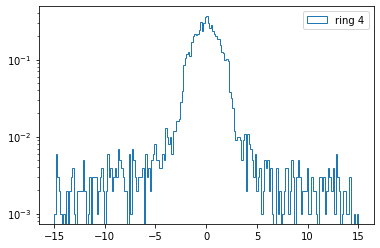

In [48]:
RING = 1
STATION = 1
ENDCAP = 1
CHAMBER = 1
mask_hit = ((hits_1.ring == 4)) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ring 4',histtype=("step"), bins=200,range=(-15,15),density = True)
mask_hit = ((hits_1.ring == RING)) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
#plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ring 1',histtype=("step"), bins=100,range=(-15,15),density = True)

mask_hit = ((hits_1.ring == RING) | (hits_1.ring == 4)) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
#plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1A+B',histtype=("step"), bins=100,range=(-15,15),density = True)
#plt.hist(ak.flatten(segments_1.res,axis=None),label='p = 1 TeV',histtype=("step"), bins=100,range=(-1,1))
plt.yscale('log')
plt.legend(loc='best')

Text(0.5, 0, 'pull')

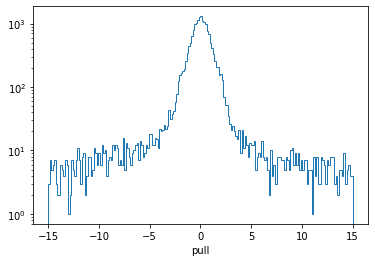

In [34]:
plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1A+B',histtype=("step"), bins=200,range=(-15,15))
plt.yscale('log')
plt.xlabel('pull')

In [35]:
mask_hit = ((hits_1.ring == 4)) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]

In [36]:
seg_pull =[]
layer = []
station = []
ring = []
chamber = []
endcap = []
from statistics import mode
#ciclo su muoni
for hits, segments in zip(hit_skim_1,seg_skim_1):
    #ciclo su segmenti
    for hit, segment in zip(hits, segments):
        #print(hit.dirxSim)
        if np.size(hit.dirxSim) == 0:
            continue
        m = mode(np.around(np.array((hit.dirxSim/hit.dirzSim)),3))
        print(m)
        counter = 0
        #ciclo su hit
        for h in hit:
            if (h.dirxSim/h.dirzSim > m + 0.01 or h.dirxSim/h.dirzSim < m - 0.01):
                print(h.dirxSim/h.dirzSim)
                layer.append(h.layer)
                station.append(h.station)
                ring.append(h.ring)
                endcap.append(h.endcap)
                chamber.append(h.chamber)
                counter = 1
        if counter == 0:
            seg_pull.append(segment.pull)

0.014
-0.012
0.014
-0.012
0.017
0.08
-0.09738028983798944
0.37297911285994767
-0.015
1.99272465995384
0.007
20695.058470007512
-0.004
-1.141
0.14726955874852854
0.13256946801179353
0.2868789312929545
-0.014
-0.002
0.004
1.8515625815862014
-0.005
1.0755563291575094
0.008
5.39157973034761
2.6608653155495574
0.012
-0.196
0.619709603003483
-1.1452180847923519
-0.4195418845164829
-0.171
2.8948756868943355
-0.9030254653835286
1.525536257880403
-0.007
0.009
0.006
-0.004
-5.537775468499599
-0.008
0.01
-0.091
-0.3937448069537301
-0.6655901417057922
0.06757396851752132
-0.003
-0.11567986373775728
0.3737703147162988
0.29887860096802077
0.017
0.005
-0.002
0.06926812840947676
-0.23517214003896902
-0.9793490316819418
-0.013
0.015
-2.1700054956486263
0.02
-4.117354737217385
44.80047473715373
-0.017
-0.006
0.009
-0.09386653197758217
0.3389338941693669
0.015
0.003
-0.0
13.34262415686813
0.18540122252568605
-238.14988964179054
0.007
-5.949188616787004
-0.003
0.005
0.017
-0.015
-0.02624093540768582
-0.04

0.2747413035951285
-0.57
-0.0370520669472094
3.673167209471684
1.7771068274455937
0.003
-0.01
0.013
11.990718878339898
-0.011
0.2034281388672075
0.02877794712065584
0.3315497477041939
-0.05017005376910042
-0.002
0.004
0.7764709620008778
-3.985660921805942
-1.0204515819973963
0.07011538021753004
0.17906373143785906
0.062
0.049784799766805686
0.04923035187033262
0.016
-0.013
0.002
0.0
0.017
-0.5554847264755535
-0.0929105235383372
0.8835107780415388
-0.014
-0.44721507699852237
0.001
0.001
0.8843189294439312
0.015
-29.2979097794052
-0.013
-0.2892846331154743
-0.425
0.10855519568010219
-0.1045212275789622
0.3676698944977167
-0.006075667558509261
-0.4676518707318349
0.008
-0.009
0.011
0.22991056551657002
-0.015
0.017
4.678247599015205
-0.015
0.017
0.4523266183378914
3.3362594070968687
-0.0
0.5207486089977352
0.003
-0.005
-227.8327878167998
0.008
0.019
-0.017
-9.581880149036696
149.7100501593337
0.007
-0.7110500733905728
-0.004
-0.017
-0.3468255290931809
-0.017
-0.016
-0.018
15.53330689864008

0.002
2.0068516291775618
16.564544816110153
0.0
-0.018
0.021
-0.01
0.012
-2.4047817839073407
0.02
-0.018
-0.007
0.009
1.697948376295371
0.018
-0.017
0.02
-1.3440679839519754
0.014
-0.01
0.18586591463195398
0.013
-8.018042526881906
-0.01
-0.013
-0.07864817336339282
-0.008
5.952888225748378
0.01
0.001
0.002
-3.9291044010933156
-0.012
0.015
0.07203971601430723
-0.4021278378799838
0.8689766463455575
0.013
-0.275
0.06454234415268352
0.21447835749858857
-0.08515144433987128
-0.011061851942164773
-0.10815089414779869
0.012
-9.448914648450524
1.5322011931263928
-0.009
0.0
0.002
-0.006
0.008
-0.4105295925710017
-0.47
-0.44842091270987877
-0.05945724891931545
-0.06752588949970491
-0.07448293462047978
-1.107020413685617
-0.005
-0.68
-0.50001170187876
0.5907188064449299
-0.003
-0.009
0.012
-0.003
0.005
-0.015
0.017
2.7166775404211725
0.116
0.14036707018567238
0.08654699177516156
0.04507977722889821
-0.0017708826579891145
-0.0263483602224061
0.007
-0.015
0.017
-22.789155555023854
-0.018
-0.018
-0.0

-0.4742822664651706
0.3081348518406747
-0.0002308664047148106
-0.013
-0.5482973956099249
-0.015
0.017
5.310133564036299
-0.005
0.008
-0.013
-5.7875030166299
-4.258926429418675
0.015
-0.003
-12.435442946382667
0.006
0.007
-0.005
0.009
-0.006
-0.087
0.29336711212845623
0.08325085640766222
0.001
-0.8151076649898085
0.046
-0.24447077961486297
-0.016296030551453573
0.4969620124162273
-0.843145399184053
-0.018
2.894109126543469
0.019
1.895098707767471
-0.19997713472455356
0.001
-0.31855934557261933
0.23775855398362
-0.12241423604492335
-0.06753004183561931
0.26750451501170697
0.001
-0.12241423604492335
0.26750451501170697
0.018
0.017
-0.015
3.8475254953491196
-11.399174810502766
13.78098128555759
-0.015
-0.007
-0.39867894098692175
1.344618162439518
0.009
0.004
-3.8881768047529106
-0.001
0.06341364922064265
-0.2151769994455161
0.2777745518893921
0.29861001680273114
0.061
-0.4158425996262677
0.007252344812584719
0.046307523043706916
-0.005
17.913645464074897
-0.0
0.003
0.005
-0.003
0.013
-0.01

-0.003
11.697766807548561
0.0
-4.90707971071915
-0.016
0.012534711364460039
0.6595446286974574
-0.016
0.021627803259134763
0.03785588916264293
-0.0
0.003
6.018809469700814
0.011
-0.008
-0.313
-0.06398013106709347
-0.6039544639681287
-0.1790916057221116
-0.005
0.008
-1.5086754990279438
0.014
-0.011
4.461098126276643
-0.008
0.01
-9.929756900830602
-0.009
-2.162953027445743
-0.7877205627881141
0.012
2.4101715796806364
-0.01
-0.005
0.008
-1.725
-0.5785071174225779
-0.6332557193442209
-0.1313196839917768
0.5461955614640129
-0.1555363726386478
0.009
-0.3082910677760309
0.3305706256515212
-0.014
0.016
-0.013
0.015
0.113
0.3636296238688143
0.32614096205506277
-0.11144722719355694
-0.5867332979914036
-0.008
28.074049979542963
0.011
-1.5745086563038002
0.004
0.009
1.616007933864431
-0.007
0.9937891847774829
-0.007
-0.46667826064497525
2.8539947318748746
0.4064779124210033
-0.005
-0.04130109914175467
-0.11483171621124405
0.008
-0.002
-0.10692201381299807
-0.10803979190472132
-151.44546925732126
0

-1.2707678761824388
0.11907471117507512
0.02695141795257143
-0.027585520506627777
0.008
-0.017996100811100826
-4.4581085288804605
-0.02590618837982596
-0.6357227517264662
0.48569718109694243
-0.005
1.11
-0.03540696900182951
0.3415448166694692
0.1438522847448396
1.6240516224884445
0.013
-0.016
-0.016
-0.23118038245212144
0.008
-0.006
4.0375018581776505
0.0
-0.506
0.318642886866698
-0.18243202807925923
-1.0171083088917172
-0.03679302884735032
0.014
-4.965725017560345
-0.011
-0.003
-0.1100076022154359
0.005
0.019
-0.017
-0.016
1.5940581384542212
-0.231
-0.12010923733205757
2.2677507508966555
0.22287808066798293
0.20882661393643964
-0.04466278496642811
-0.015
-1.9813187707742497
-0.015
5.0556211591632865
0.016
0.1426074271402421
-0.19273389213964193
-0.18932566051362323
0.05118783989819713
-0.013
0.9391683928135538
0.017
0.018
-0.015
-0.005
-2.4059620308056675
-32.08784821508857
0.008
-0.003
-0.014
-0.9073288784470603
0.96705789101663
-0.169
-0.4821880330704478
-0.014700063704095242
0.3203

-0.17954181498801153
0.3221700456508456
0.35345573185025825
-0.014
0.5117521573387711
0.017
0.006
0.8532215647213821
0.31482000082581524
-0.004
0.016
0.003
0.0
-0.002
0.005
0.014
-0.012
-0.118
0.01481102779548945
0.1160725612279419
0.12296559228467711
-0.015
0.2683161814382675
0.9832299184149543
0.007
-0.005
61.70999525313776
-0.015
1.186591199771054
0.017
-0.04200369987141209
0.007
-0.018
-1.083261481455846
-0.225631530944583
0.0025921001333897692
0.04145730722948815
0.04950130123563628
-0.072
-5.146735225795836
0.10629523207746414
-0.0006708421372033223
0.02610644708573808
-0.014
-0.02
-0.9350829502355308
0.17549592838508368
-12.827666852733932
-0.0871211599712365
0.3363970382814067
-0.007
0.08370575533713989
0.001
0.002
0.01
-0.903
3.5886989093993087
-0.1580351582463598
-0.12889889378047717
-0.15932365400769308
-0.18980406674343656
-0.003
4.952006449796681
0.006
0.884
-0.09627373588700659
0.0958832022040478
-0.09237877435108915
0.283
0.19200954853727814
0.08347823959872264
0.3448942

0.014
-0.012
-0.005
-0.09286187401767067
-0.055
-0.007808736811876139
0.00036259627558680476
-0.29211995834746707
-0.5012371117986153
0.01
-1.0738082147561308
0.009
3.5312428668678373
0.148
-0.22946640115743086
-0.009781290701080445
-0.01145453664359935
-0.15187757586826164
0.014
-5.405680044296225
0.005
-0.11663482824899758
-0.003
-0.9167273551000807
0.007
0.02806586866537042
-0.18903698680047448
2.970512595833386
-0.004
3.789655160865765
0.013
-0.015
-0.632983664971057
0.018
-0.7089596393985124
3.2969901014331717
-0.008
0.011
3.6837589540396376
0.016
-10.641245885743249
-0.014
-0.007
0.009
0.006
1.0936381060450746
-0.003
0.0
0.003
-0.003
-15.40326524051618
14.117463599755782
0.006
-0.008
0.01
0.15507880156905132
-0.06296677650772342
0.008
-49.32239413138595
-0.006
-0.008
-1.4211365871278043
-0.099
-0.0020835932665612413
-0.28484679204291713
0.5503750020296009
0.590959010380074
-0.4696945930441217
0.005
-0.006
0.009
9.262889623035658
-0.446
0.12786613701898805
0.33820731506566437
0.00

0.003
0.4497320694637614
-0.334050053311543
0.11639522126780612
-0.0
-0.2935021522298253
-0.043778505696235114
-0.5434721279374503
-0.015
0.017
0.6753367438113768
-0.006
0.008
-0.01
0.013
0.125
-0.09719829262790948
0.2601777347750576
-0.1168177269689461
-0.01
0.013
0.007
1.8889840751724951
-0.001
0.004
-0.006
-0.22455449407674982
0.009
0.3677975752979213
-0.8184810994914754
0.077
-5.626677346536207
0.06170134758119703
-0.021
0.005
-6.999715055596028
-0.003
-0.5481358542650592
-0.05231251380773306
-0.06305883298775643
-0.006
8.350824668669071
0.008
-0.016
-4.881015251918853
0.019
0.018
-0.015
0.1967006835725966
-2.6814105232967953
-0.1495446266602115
0.105
0.5136418809728683
-0.49532391096100614
-0.04180632294505713
-1.194577611495192
0.017
-0.008
4.264055178893876
0.011
-0.29683128249013396
-0.004
0.006
0.003
16.965493300710786
0.003
0.0
0.016
-0.013
1.5260985489079257
-0.02
-5.144371159324798
0.022
0.009
8.163999183644918
-0.006
-0.506
-0.11957591715632898
0.2677239214106505
-0.417269

0.007
-0.005
-0.003
0.006
-10.46101958338069
0.012
0.2870506703661361
-0.01
3.058615760818583
-7.364728089857013
0.013
-0.011
0.002
0.0
-0.7729422867962482
0.21776720288162094
-0.013
13.969839338177733
0.016
-73.12846403261176
0.012
-0.009
0.01
0.008
-0.32091890700905346
-0.006
0.325
0.1018180733969545
-1.2120545128142488
0.5319697625784146
-0.04542151871279128
0.09449328792327881
0.115
-1.5305943817041312
0.0995186146402826
-0.010620814936680717
-0.003
0.006
11.04315331468202
-7.598
-5.428830142558065
-0.01982769815341579
-0.542225907151991
0.183241462595403
-0.009
5.84712198120455
-0.003
-1.0593528477805205
0.005
0.001
-0.533
1.3086350104982134
1.0635338564758174
-0.008014225894560858
0.0
1.353543153265425
-0.6336988277204026
0.003
-0.40458754027500904
0.5099245858747403
-0.009
-0.08756137102265264
0.0612403110350202
1.9745948658585653
0.011
0.18994006523190196
6.437544078828057
0.004
-0.002
28.47957834560298
0.09299222870315937
0.2747539113269472
-0.013
0.14
0.7503330345268163
0.397

0.008
-0.258
-0.006047667959773916
-0.2782250804301852
-0.29764255554875435
-0.30250738535255073
-0.8655636055693975
0.006
-0.003
0.017
0.807629629669831
-0.014
-1.0437051448363999
1.0494439920994971
1.082
0.4937103959012939
0.010445092459419762
-1.0923788871077238
-0.9449527470468914
-0.2706217063537979
0.015
0.008
-0.005
-0.0334040413310052
-0.002
0.004
0.012
-0.009
-0.417
0.9685670357710575
0.8510843194737898
-0.21245624834448845
0.5045734795792773
0.42860032102164347
0.009
-0.006
-7.2608097450719065
0.008
0.005
-1.4898896191558326
0.009
-0.007
11.999782047015884
0.057
0.07009542523326458
-0.04440238476315647
0.07173244671505306
0.07807761821830417
-0.012
-0.9992012703141328
-0.5305869386458424
-0.35195613954280935
0.015
-0.048554196521811796
-0.027798471297862098
0.03341372185203002
-0.15123172326585194
0.145
-0.10099515968200101
-0.23028695458221785
-0.16466443657795815
2.157020310035604
0.26240923761633544
0.002
-2.595444636386227
0.006
-2.198654648423305
-0.004
1.701507702418527

0.018
-0.015
0.06458823406397414
-0.36826874164742546
-0.005
0.008
-45.35282685392254
-0.749502040052113
-2.035716170579744
-0.013
21.701663454052397
-1.118
8.918853265874233
-0.31867803944554346
-0.3305626625636686
-3.637326051276501
0.24816165103833182
-1.118
-0.5902804457886791
-0.47245995347035497
0.14451356282702404
0.259
-0.9700556578741949
1.3119011843846549
0.08847800421116246
-0.012
-14.645135758127216
0.312
-0.13754330316674643
-0.8661285142614189
0.016
-0.15050361270980228
0.7079130818139615
-0.004
0.007
-0.0
-0.2994518818269449
0.015
-0.8444461701484718
-0.013
0.049
-0.5560036016621007
-0.2113135828763954
-0.8184558811581844
-0.015
-1.8287126662166686
-0.28136448970368627
-0.037
0.10481183130209318
-0.8237336384055302
0.03733262662408111
-0.17194530786780168
0.017854383064873903
0.012
-0.009
0.002
3.914857944898232
-0.0
-0.001
0.21339408918659092
-0.2179315277138253
0.042409113732859244
-1.335
-0.44067891542431004
0.2665635838903288
0.10049218138537307
-0.005
0.813926461574

-0.04472305407323836
-0.018489463410106585
-0.00672714967735162
-0.030007580773405165
0.005
-0.003
0.002
0.16342752712325734
7.54428398503623
0.0
0.014
-0.011
-6.800266092624152
-0.008
0.011
-0.0321476453528703
1.8911821993731215
-0.007
0.01
-0.045
0.01951174112556862
0.0026965088268045274
0.046789582411620276
0.060583189923419344
0.07543595021434678
-0.003
0.006
0.006
-0.004
-0.704824678039905
1.1803585952357931
-1.0710732061792845
-0.009
0.012
-0.006
-0.030349506323312958
-0.06796040482529532
-0.11993055442180278
0.009
-0.01
0.012
0.005
-4.184915928027448
-0.8962033140420641
-0.003
0.7002192052277757
0.081
-0.15856189724078318
-0.046516717205791105
-0.4939342068254525
-0.24626168751168154
-0.033377264183083316
0.094
0.12786121114632665
1.247229051875934
0.8230752721206882
-0.7849400568993199
-0.03215028477070714
0.016
-2.8227409560198953
1.3385278533740865
7.433787343839506
-0.013
-0.016
0.019
-0.015
0.018
-1.7931159406446207
0.006
-0.004
-0.014
0.016
-0.473
0.18221480663355377
-0.01

0.017
0.6059912372066163
-0.014
2.0453459492603034
-0.007
-1.568
0.5708212859448398
0.3468908282505653
0.4380700019630076
-0.5060214886342911
0.001
0.002
0.012
-0.01
0.005
6.209830688674826
0.7447710528139143
7.246885462982067
-0.003
-0.008
-2.060512871425778
-0.101
-0.02856251820560542
-0.051008175302046745
-0.005204678324235146
-0.08489925363412802
-0.0476775592904049
0.009
-0.006
0.009
-0.007
1.7585469151576172
0.018
0.8764889434536808
-0.014
0.016
-0.013
0.015
-0.009
0.012
0.014
-0.011
-0.008
-10.434975021777788
14.775197013137156
0.011
-3.8437719339045264
0.004
-0.002
0.152
-0.021179711858431836
-0.23358857566868205
0.6624538461395076
-0.00108281119015825
-0.005
0.004
-0.004
-0.011
0.013
0.015
-0.058199921496352766
0.3103669541375118
-0.049027132500451
0.04776548159937091
0.11743991274777917
-0.013
-3.2986909460099234
0.015
9.911684692115767
0.002
2.8454065371522024
-0.0
-0.7481858174896253
0.016
-0.014
0.31103240913457664
-0.014
0.018
3.806989640575546
-0.009
0.011
0.02
-0.017
-0

0.21286437200330213
-0.001
0.055
0.004149541775092702
-1.12434460354863
-0.015
0.017
-7.63174708094175
0.02
-0.019
-0.017
0.5891889503530404
0.4950298701040738
-0.07079683398682349
0.012
-0.22832588991133784
-0.013899784437471713
0.3404006845455284
-0.009
-18.44554208242953
0.006
0.012
0.17652825245110043
0.40671657518494814
-0.28300400349067273
-0.009
0.14
-0.29094255444435546
0.04522195026019189
-0.28922504877039573
0.23023822772622304
-0.08115463560169
0.013
3.2509733610899185
-0.01
-0.476
-0.006449415310209423
0.06453265527937481
-0.2128066108028038
0.009
-5.167739734429832
-0.007
-0.013
1.9026721275969647
-7.544385919796547
0.016
-0.01
-27.61481368836911
0.013
-0.025287096768088716
-0.03651085140923829
0.001
13.191461947888525
0.001
0.7924062506458508
-0.0
-0.015
0.19805466982594616
10.424795681619685
0.018
0.013
0.48513592305583936
519.1031066617134
-0.129
-0.5166354483002132
-0.17091375958754246
0.012
-0.009
-0.008
0.011
-0.015
0.017
56.260045425418774
-2.462
1.208748931507552
0

0.01
1.4873850285916097
-0.008
-0.013
0.015
0.027
0.013321339869909587
-13.889754513460307
0.1512734945876571
0.01
16.778053869100475
-0.011
-7.244075904656753
0.014
-0.24950443205968414
-0.004
0.007
-0.005
-0.33151799266794135
0.015
-0.013
0.001
0.002
-0.009
0.011
-8.635170174552181
-0.009
0.21925731306415344
-0.15341847282662688
0.012
-0.20984417390414115
-0.15248422922122856
0.01
0.03550679119335907
-0.007
-0.011
-0.012
2.3145342897784444
1.294278341470156
4.993828846536971
0.015
-0.18659129138833297
-0.004
0.109
-0.39025544754150077
0.45504234654286085
-0.11132208695898328
0.012
0.0889639605463869
0.002
-10.811327431327406
-0.0
-0.002
0.193
-0.022323255525531632
-0.01726718992533862
0.01655972799844799
0.03268784847063728
0.07114578797088653
-0.015
0.009
-6.502710047414586
-8.314144482856692
-0.006
1.5058466494052434
-0.014
-0.524099094467502
0.017
-0.015
32.03093662113628
2.7313988143234393
0.064
-0.019057381199880576
0.016
1.8435645253076003
0.088
-0.06748153336462306
0.334248910

-0.016
0.018
-0.019
0.013454955995302607
0.0724252040515645
0.5381665702030493
-0.04714453069260678
-0.06015943463351643
0.197
0.46836570699598645
0.05109515362278785
-0.10823891924004263
-0.0011267110394834838
1.502
1.565570718482536
-0.08655836597636507
-0.14040308813253885
-0.1815470552688973
-0.18979087280055787
0.005
-0.002
0.4640685415605122
0.009
-0.006
-0.14655228545009977
0.018
-2.508209731551715
0.7383055201057764
0.002
0.001
-1.8210375532892389
0.001
-0.002
0.004
-1.208694423106468
0.018
-0.015
0.006
-0.004
0.013
-0.011
-0.05099124921534401
-0.2757328239860051
0.023
-0.02
-0.01
-2.3106156079296025
-3.4509934255217134
0.12642240035748634
1.119269844406993
0.013
70.19433477574358
-0.004
0.007
0.003
0.8027820826050295
-0.09
-0.34848343188443504
0.388448557796537
-0.009
-1.3773813674310948
0.6651751788053921
0.011
0.003
-0.001
-1.7297525071367263
0.003
0.018
-0.06489722729797788
0.8355398306776588
-0.694151015727162
-3.2067563404536285e-06
-0.015
-0.016
0.018
-0.004
0.007
-0.012

-0.884
-0.29509222454864437
1.0518923437868966
-0.11789841817474547
-0.007
0.8663370029860044
1.7855962583053229
3.7412014748705213
24.505
1.4093888008571642
-0.3395080539532922
0.07732238373857037
0.0
13.02583876787513
-0.45512910675910484
0.012
-0.08287073502959995
-0.009
0.010512667279370086
-0.03567112880718899
-0.06759036057388852
0.005
-8.14216188648822
-0.003
0.021
0.6285852932974176
-1.223312328291792
-0.018
3.6132452653740015
0.037
-0.0038706700028697063
0.02487016569621378
0.01851681649947285
-0.013
-0.10195695591930952
0.33115632929425226
-1.255264264187971
-0.33058378077467576
0.001
0.002
-0.016
-0.014
-3.6904302312386776
-0.114
-0.5364701714667307
-0.0188819982330265
-0.115
-0.05719784881156328
-0.3468411883407719
0.1514078206789273
-0.9504512381118915
-0.005
-0.07885172739494692
-0.32445303438338435
0.0946536878977435
-0.26556979016528476
-0.05
-0.027246630128377036
0.007071836600264573
-0.014325421636285144
-0.006877522492206463
-0.022347086955676984
-0.006
-0.4677432795

0.013
-2.802123343262975
-0.15
-0.4180585645748309
0.25563739509546085
0.013947648812187552
-0.16885760643697992
0.6153585233111855
0.017
3.4272991731709768
-0.014
-0.15430240958617072
-2.498913897513333
0.017
-0.018
-14.86761514894242
0.021
-0.014
0.07293448009850077
-4.591952744338378
-0.368
0.2288903351294455
-0.08155241370316016
0.02083561968248741
0.10855339812124314
-6.02427274927323
0.525
-1.3834644297643117
-0.2094091750548887
0.10347027996510454
0.24243861591954072
0.011
-0.008
-0.003
-0.28585061704789483
0.8023926385397583
0.1086233469251526
0.26421276217267503
0.004
0.017
-0.019
0.002561366934191156
0.06751063705814422
0.0006359541259683044
0.16
0.9801101070309316
0.5970859927137859
0.38603285166281925
-0.004
1.2787709756315069
0.3273914314094154
0.07634777329454076
0.6084759213197948
0.014
-0.3276015119823405
0.12190800296352008
-0.13487073819587406
-0.056
0.17013554526196575
-0.04007607900037424
-8.560400919533803
0.1216399270549128
-0.007
3.6341910531056283
0.01
-0.001
0.

-0.005
0.008
-2.396221662766374
0.017
-0.014
-2.228151349781068
0.0
0.003
0.011
-2.514642137965709
0.155
0.32174385655780496
0.6286295049295909
-0.06177827334537428
-0.3866587401855376
0.2361652167425898
-0.001
0.003
0.004
-0.001
-0.01
0.013
-0.11780067035462147
-0.007
0.009
0.005
-0.002
9.933790948998613
-0.011
0.014
-18.906312439982326
-0.0
0.002
-0.152
0.29710712145953144
-1.2051331351296128
0.007783449761477329
0.049337789482186416
0.058378399766391205
-0.005
0.014
0.02628400178358016
-0.012
-2.256598127691313
0.106
-0.3736440717371777
-0.016
-1.0399714018940909
68.49260142754035
-0.017
0.24207029145200298
0.019
-17.948820124577225
0.3831609208592813
0.017
-0.015
0.009
-0.007
-2.923
-0.008589843094818351
-0.03718416938915704
0.011
0.2308950146449387
-0.06811115502088828
-0.23092060563878286
-0.28504543988600767
-0.008
0.01
-0.01
0.012
4.969668475185568
0.015
-0.013
0.011
0.6881216508186017
-0.009
0.015
-0.012
2.054877249027322
-0.011
0.014
0.2526005833095577
-0.007
0.01
0.21
-0.083

-0.0
-0.021
0.013
-0.011
-13.752374280309304
-0.004
0.007
-0.018595227787454396
0.017
-0.014
-122.24328320106962
0.003
-0.001
0.012
-0.17861935099064818
-0.004
0.005
0.011
0.08771072178740921
-0.07715818825834653
-0.07374009815888215
3.922416914316397
-0.0
0.08188708683633254
-0.2561221033341509
-0.31389788691114956
0.06974280381984035
0.12916619649312222
0.003
-3.4620359530725096
0.0
5.1281345375522465
-0.017
0.02
0.009
44.35285497803831
0.9960961390166724
-0.006
0.8822034732714669
0.030987059138654523
-0.01
0.012
-0.018
-0.005
0.008
0.003
0.12335718557717303
-0.001
-0.009
0.008
-0.005
-1.370398192370927
-0.3474046010544045
-0.48524309819488803
0.013
-2.264670458597551
-0.01
-0.722775202720968
-1.479
-0.704028708630467
-0.003515107616270945
0.7192920250550464
0.006
-0.001
-0.048
-0.6155980798381109
-0.5192599118751775
4.032373172363807
0.003
-0.001
21.933869738133488
-0.003
0.006
-0.607895137173067
0.013
-1.2023013963683942
-0.011
-0.7547255060984839
0.003
-0.3560785592699409
0.315480

-0.004
-10.290096243727836
0.007
7.223781012231122
0.16922897138160942
-0.77
0.036058861309592176
0.3186115131913215
0.2716597910505535
-0.139
0.0019381746616382034
0.08095711211877382
0.0567668014918778
0.04454991964438284
0.03821152681523002
-0.01
-0.217
0.08760586233562456
0.8977872105076539
0.019482715417404536
-0.25998300802914426
1.133930539492701
-0.015
-0.009
-2.622714753989924
0.012
0.004
2.718745376771621
-0.128
-0.10423723042908258
-0.03456276782130746
-5.877950612913617
0.014
1.65
-0.011655854843605524
0.3553134832166573
1.1978102137600815
-0.013
0.016
-0.0749159710128167
0.06779619898762486
-0.007
0.009
0.1833888713672258
1.7110883903789167
-0.9451621907793132
-0.1525562428861346
0.001
11.38355648548586
4.512511699744503
0.002
0.003
12.07231511729576
-0.6794169335168384
0.004
-0.002
0.006
9.203037029983195
-0.003
0.021
-0.02
3.524385834039984
-0.019
-0.008
2.3670696092062604
0.01
0.015
-5.355793229893411
0.012
0.07522133264060518
0.12981151067061136
0.4747407846141055
-3.6

-1.4722073354111276
-22.345687166409174
-0.009
0.022
0.48026062583705365
-0.019
-0.002
4.502383889717262
-0.8070461421406566
0.004
0.38209667782569606
0.003
-0.002
-20.906896780272263
-2.6759334058012474
0.174
0.004168191535295895
-14.468054869440419
0.744217630160626
-0.016
0.018
0.017
-0.015
0.20833615819712084
-0.118
-0.16888909031467825
-0.13808877739937625
-0.16326129013989477
-0.16644108201979813
0.025
0.11494900508727465
0.05832266499402476
0.07158673530180223
0.001
-0.7215408522772192
-0.6157182837932418
-0.005
0.008
-0.009
1.4531125843351587
0.012
0.02
-0.017
0.011
-0.008
0.178
0.005040256676528581
0.1939683129106221
0.013206286068853412
-0.003
-18.789778282814936
0.012
-0.009
-0.3245872052555925
0.3250882532941741
0.012
0.016
-0.014
0.7352540078656451
-0.015
0.017
-0.18061235614668247
0.3080590632818737
0.008
-0.005
0.002
-2.1163976047151034
0.001
-0.005
0.008
0.004
-0.001
0.04071931861117204
0.005
-0.12291942134765388
-0.002
-0.017
-0.0
0.025
118.96581116774146
-0.0474822274

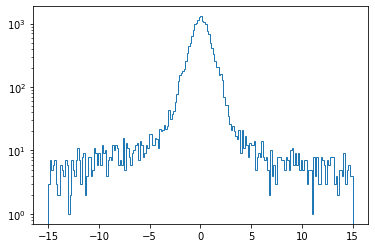

In [56]:
#plt.hist(seg_pull,label='p = 1 TeV',histtype=("step"), bins=200,range=(-15,15))
plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='p = 1 TeV',histtype=("step"), bins=200,range=(-15,15))
plt.yscale('log')

In [ ]:
numpy_array = np.column_stack((np.array(MUhits_1[37640].station),np.array(MUhits_1[37640].ring),
                          np.array(MUhits_1[37640].chamber),np.array(MUhits_1[37640].endcap),
                          np.array(MUhits_1[37640].layer),np.array(MUhits_1[37640].xErr)))
df = pd.DataFrame(numpy_array, columns=['station', 'rings','chamber','endcap','layer','x'])
df

In [ ]:
numpy_array = np.column_stack((np.array(ak.flatten(hits_1[37640].station)),np.array(ak.flatten(hits_1[37640].ring)),
                          np.array(ak.flatten(hits_1[37640].chamber)),np.array(ak.flatten(hits_1[37640].endcap)),
                          np.array(ak.flatten(hits_1[37640].layer)),np.array(ak.flatten(hits_1[37640].xErr))))
df = pd.DataFrame(numpy_array, columns=['station', 'rings','chamber','endcap','layer','x'])
df

In [ ]:
plt.hist(ak.flatten(MUhits_1.x,axis=None),label='p = 1 TeV',histtype=("step"), bins=200,range=(-60,60),density=True)
print(ak.num(ak.flatten(MUhits_1.x,axis=None),axis = 0))
plt.hist(ak.flatten(hits_1.x,axis=None),label='p = 1 TeV',histtype=("step"), bins=200,range=(-60,60),density=True)
print(ak.num(ak.flatten(hits_1.x,axis=None),axis = 0))
plt.yscale('log')

In [ ]:
plt.hist2d(np.array(ak.flatten(hits_1.ring,axis=None)), np.array(ak.flatten(hits_1.station,axis=None)), label='p = 1 TeV', bins=5,range=((0.5,5.5), (0.5,5.5)))
plt.xlabel("ring number")
plt.ylabel("station number")

In [ ]:
RING = 4
STATION = 1
ENDCAP = 1
CHAMBER = 1
mask_hit = (hits_1.ring == RING) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.zLayer,axis=None),label='ring 4',histtype=("step"), bins=200,range=(580,630))


RING = 1
STATION = 1
ENDCAP = 1
CHAMBER = 1
mask_hit = (hits_1.ring == RING) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.zLayer,axis=None),label='ring 1',histtype=("step"), bins=200,range=(580,630))
plt.legend()

In [ ]:
RING = 1
STATION = 1
ENDCAP = 1
CHAMBER = 1
mask_hit = (hits_1.ring == RING) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='p = 1 TeV',histtype=("step"), bins=200,range=(-10,10))
#plt.hist(ak.flatten(segments_1.res,axis=None),label='p = 1 TeV',histtype=("step"), bins=100,range=(-1,1))
plt.yscale('log')

In [ ]:
mask_hit = (hits_1.ring == 1) & (hits_1.station == 1)
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='ME1/1',histtype=("step"), bins=200,range=(-0.6,0.6),density=True)
mask_hit = (hits_1.ring == 2) & (hits_1.station == 1)
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='ME1/2',histtype=("step"), bins=200,range=(-0.6,0.6),density=True)
mask_hit = (hits_1.ring == 1) & (hits_1.station == 2)
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='ME2/1',histtype=("step"), bins=200,range=(-0.6,0.6),density=True)
mask_hit = (hits_1.ring == 2) & (hits_1.station == 2)
hit_skim_1 = hits_1[mask_hit]
plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='ME2/2',histtype=("step"), bins=200,range=(-0.6,0.6),density=True)
plt.legend()
#plt.yscale('log')

In [ ]:
mask_hit = (hits_1.ring == 1) & (hits_1.station == 1)
hit_skim_1 = hits_1[mask_hit]
n, bins, _ = plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='ME1/1',histtype=("step"), bins=200,range=(-0.6,0.6),density=True)
plt.yscale('log')
histo = ROOT.TH1D("Station 1, Ring 1","Station 1, Ring 1",len(np.array(bins))-1,np.array(bins))
histo.Sumw2()
fill_hist(histo, np.array(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None)))

In [ ]:
import ROOT as R

# Create observables
x = R.RooRealVar("x", "x", -0.6, 0.6)

# Construct signal pdf
mean = R.RooRealVar('mean', '', histo.GetMean(), -0.6, 0.6)
sigma = R.RooRealVar('sigma', '', histo.GetRMS(), 0, 1)
alpha_1 = R.RooRealVar('alpha_1', '', 1, 0, 100)
alpha_2 = R.RooRealVar('alpha_2', '', 1, 0, 100)
n_1 = R.RooRealVar('n_1', '', 3, 0.5, 100)
n_2 = R.RooRealVar('n_2', '', 3, 0.5, 100)
a0 = R.RooRealVar('a0', '', 0, -10, 10)
a1 = R.RooRealVar('a1', '', 1, -50, 10)
a2 = R.RooRealVar('a2', '', 1, -10, 10)

#cbs_1 = R.RooCBShape("CrystallBall_1", "CrystallBall_1", x, mean, sigma, alpha_1, n_1)
#cbs_2 = R.RooCBShape("CrystallBall_2", "CrystallBall_2", x, mean, sigma, alpha_2, n_2)
pol2 = R.RooChebychev("pol2","pol2",x,R.RooArgList(a0,a1,a2))
gauss = R.RooGaussian( 'gauss', 'gaussian PDF', x, mean, sigma)
mc_frac = R.RooRealVar('mc_frac', '', 0.5)


sig = R.RooAddPdf('sig', '', R.RooArgList(gauss,pol2), R.RooArgList(mc_frac))
sig_yield = R.RooRealVar('sig_yield', '', histo.Integral(), 0, 100000)

x.setRange("range", -0.4, 0.4)

fit_range = "range"

data = R.RooDataHist("hist_res","hist_res",R.RooArgSet(x),R.RooFit.Import(histo))
#print(type(sig.generate(R.RooArgSet(x), 1000)))
print("ehi")
sig.fitTo(data, R.RooFit.Range(fit_range))
my_plot = x.frame()

data.plotOn(my_plot)
sig.plotOn(my_plot, R.RooFit.Range(fit_range))
print(sig.getParameters(data))

can = R.TCanvas()
#can.SetLogy()
my_plot.Draw()
can.Draw()

In [ ]:
c1 = ROOT.TCanvas()
histo.Draw()
#histo.Fit("gaus","","",-0.1,0.1)
'''
fitDSCB = ROOT.TF1("fitDSCB",DoubleSidedCrystalballFunction,1,1)
fitDSCB.SetParameters(1, 1, 1, 1, histo.GetMean(), histo.GetRMS(),histo.Integral())
fitDSCB.SetParNames ("alpha_{low}","alpha_{high}","n_{low}", "n_{high}", "mean", "sigma", "Norm")
histo.Fit(fitDSCB, "", "", -0.5, 0.5);
'''
f_cb = ROOT.TF1("MyCrystalBall","crystalball",-1,1);
f_cb.SetParameters(histo.Integral(),histo.GetMean(),histo.GetRMS(),2,1.5);
histo.Fit(f_cb, "", "", -0.1, 0.1);

histo.GetXaxis().SetTitle("dx resolution")
histo.GetYaxis().SetTitle("Entries")
#c1.SetLogy()
ROOT.gStyle.SetOptStat()
ROOT.gStyle.SetOptFit()
c1.Draw()

In [ ]:
print("dx/dz")
for i in range(0,6):
    print(hits_1[0][1][i].dirxSim/hits_1[0][1][i].dirzSim)
print("x sim")
for i in range(0,6):
    print(hits_1[0][1][i].xSim)
print("y sim")
for i in range(0,6):
    print(hits_1[0][1][i].ySim)

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
    
m = 100
s = 0
    
    
ax.view_init(20,30)
ax.scatter(np.array(hits_1.xSim[m][s]), np.array(hits_1.ySim[m][s]),np.array(hits_1.zLayer[m][s]),label ='Sim Hits')
ax.scatter(np.array(hits_1.x[m][s]), np.array(hits_1.y[m][s]),np.array(hits_1.zLayer[m][s]),label ='Reco Hits')
for i in range(0,6):
    ax.quiver(hits_1.xSim[m][s][i], hits_1.ySim[m][s][i], hits_1.zLayer[m][s][i],
          hits_1.dirxSim[m][s][i]/hits_1.dirzSim[m][s][i], hits_1.dirySim[m][s][i]/hits_1.dirzSim[m][s][i],0,color='orange',length =5)
    print(str(hits_1.zLayer[m][s][i])+ ": "+str(hits_1.dirxSim[m][s][i]/hits_1.dirzSim[m][s][i]))
plt.xlabel('x')
plt.ylabel('y')
yy, xx = np.meshgrid(np.arange(11,23,2),np.arange(-50,-5,0.01))
zz = yy*0+hits_1.zLayer[m][s][0]
#print(xx)
#print(zz)
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)
zz = yy*0+hits_1.zLayer[m][s][1]
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)
zz = yy*0+hits_1.zLayer[m][s][2]
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)
zz = yy*0+hits_1.zLayer[m][s][3]
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)
zz = yy*0+hits_1.zLayer[m][s][4]
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)
zz = yy*0+hits_1.zLayer[m][s][5]
plane = ax.plot_surface(xx, yy, zz,alpha=0.3)

In [ ]:
(ak.to_pandas(hits_1.chamber))['values'].unique()

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

m = 5
s = 0
'''
ax.view_init(10,90)
ax.scatter(np.array(hits_1.xSim[m][s]), np.array(hits_1.ySim[m][s]),np.array(hits_1.zLayer[m][s]),label ='Sim Hits')
ax.scatter(np.array(hits_1.x[m][s]), np.array(hits_1.y[m][s]),np.array(hits_1.zLayer[m][s]),label ='Reco Hits')
for i in range(0,6):
    ax.quiver(hits_1.xSim[m][s][i], hits_1.ySim[m][s][i], hits_1.zLayer[m][s][i],
          hits_1.dirxSim[m][s][i]/hits_1.dirzSim[m][s][i], hits_1.dirySim[m][s][i]/hits_1.dirzSim[m][s][i],0,color='orange',length =5)
    print("station:"+str(hits_1[m][s][i].station)+"ring: "+str(hits_1[m][s][i].ring)+" chamber:"+str(hits_1[m][s][i].chamber)+ 
      " endcap:"+str(hits_1[m][s][i].endcap)+ "layer: "+str(hits_1[m][s][i].layer))
'''  
s = 1
ax.scatter(np.array(hits_1.xSim[m][s]), np.array(hits_1.ySim[m][s]),np.array(hits_1.zLayer[m][s]),label ='Sim Hits')
ax.scatter(np.array(hits_1.x[m][s]), np.array(hits_1.y[m][s]),np.array(hits_1.zLayer[m][s]),label ='Reco Hits')
for i in range(0,6):
    ax.quiver(hits_1.xSim[m][s][i], hits_1.ySim[m][s][i], hits_1.zLayer[m][s][i],
          hits_1.dirxSim[m][s][i]/hits_1.dirzSim[m][s][i], hits_1.dirySim[m][s][i]/hits_1.dirzSim[m][s][i],0,color='orange',length =5)
    print("station:"+str(hits_1[m][s][i].station)+"ring: "+str(hits_1[m][s][i].ring)+" chamber:"+str(hits_1[m][s][i].chamber)+ 
      " endcap:"+str(hits_1[m][s][i].endcap)+ "layer: "+str(hits_1[m][s][i].layer))

s = 2
ax.scatter(np.array(hits_1.xSim[m][s]), np.array(hits_1.ySim[m][s]),np.array(hits_1.zLayer[m][s]),label ='Sim Hits')
ax.scatter(np.array(hits_1.x[m][s]), np.array(hits_1.y[m][s]),np.array(hits_1.zLayer[m][s]),label ='Reco Hits')
for i in range(0,6):
    ax.quiver(hits_1.xSim[m][s][i], hits_1.ySim[m][s][i], hits_1.zLayer[m][s][i],
          hits_1.dirxSim[m][s][i]/hits_1.dirzSim[m][s][i], hits_1.dirySim[m][s][i]/hits_1.dirzSim[m][s][i],0,color='orange',length =5)
    print("station:"+str(hits_1[m][s][i].station)+"ring: "+str(hits_1[m][s][i].ring)+" chamber:"+str(hits_1[m][s][i].chamber)+ 
      " endcap:"+str(hits_1[m][s][i].endcap)+ "layer: "+str(hits_1[m][s][i].layer))
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
plt.hist(np.sqrt(ak.flatten((hits_1.x-hits_1.xSim)*(hits_1.x-hits_1.xSim)+(hits_1.y-hits_1.ySim)*(hits_1.y-hits_1.ySim),axis=None)),label='p = 1 TeV',histtype=("step"), bins=100,range=(0,10))
#plt.yscale('log')

In [ ]:
RING = 1
STATION = 1
ENDCAP = 1
CHAMBER = 1

In [ ]:
#select only hits & segments in the ring and station specified 
mask = (hits_1.ring == RING) & (hits_1.station == STATION)
mask2 = (ak.num(hits_1[mask],axis=2) == ak.num(hits_1,axis =2))

In [ ]:
plt.hist(ak.flatten(segments_1.dirx[mask2],axis=None),label='p = 1 TeV',histtype=("step"), bins=100)

In [ ]:
mask = (hits_1.ring == RING) & (hits_1.station == STATION) & (hits_1.endcap == ENDCAP)  & (hits_1.chamber == CHAMBER)
mask_1 = (hits_1.ring == RING) & (hits_1.station == STATION) & (hits_1.endcap == -ENDCAP) & (hits_1.chamber == CHAMBER)

In [ ]:
plt.hist(ak.flatten(hits_1.xErr,axis=None),label='p = 1 TeV',histtype=("step"), bins=100, range =(0,0.5))
plt.hist(ak.flatten(hits_1.yErr,axis=None),label='p = 1 TeV',histtype=("step"), bins=100, range =(0,0.5))
plt.yscale('log')

In [ ]:
for count, hits_muon in enumerate(hits_1):
    #print(hits_muon)
    #print("i ",count)
    #print(hits_muon.layer)
    #df = np.array(ak.flatten(hits_muon.layer))
    numpy_array = np.column_stack((np.array(ak.flatten(hits_muon.station)),np.array(ak.flatten(hits_muon.ring)),
                          np.array(ak.flatten(hits_muon.chamber)),np.array(ak.flatten(hits_muon.endcap)),
                          np.array(ak.flatten(hits_muon.layer))))
    df = pd.DataFrame(numpy_array, columns=['station', 'rings','chamber','endcap','layer'])
    bool_series = df.duplicated(keep=False)
    #print(bool_series)
    if bool_series.any() == True:
        print('duplicate found')
        print(count)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(1,7):
    #print(i)
    #if i ==1:
    ax.scatter(np.array(ak.flatten(hits_1.x[mask & (hits_1.layer == i) ],axis=None)), np.array(ak.flatten(hits_1.y[mask  & (hits_1.layer == i) ],axis=None)), np.array(ak.flatten(hits_1.zLayer[mask  & (hits_1.layer == i) ],axis=None)))
    #ax.scatter(np.array(ak.flatten(hits_1.x[mask_1 & (hits_1.layer == i)],axis=None)), np.array(ak.flatten(hits_1.y[mask_1 & (hits_1.layer == i)],axis=None)), np.array(ak.flatten(hits_1.zLayer[mask_1 & (hits_1.layer == i)],axis=None)))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
def PlotSegment (hits,m,s):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection='3d')
    #m = 2
    #s = 1
    ax.view_init(20,40)
    ax.scatter(hits.xSim[m][s], np.array(hits.ySim[m][s]),np.array(hits.zLayer[m][s]),label ='Sim Hits')
    ax.scatter(hits.x[m][s], np.array(hits.y[m][s]),np.array(hits.zLayer[m][s]),label ='Reco Hits')

    x = np.array(hits.xSim[m][s])
    y = np.array(hits.ySim[m][s])
    z = np.array(hits.zLayer[m][s])

    xr = np.array(hits.x[m][s])
    yr = np.array(hits.y[m][s])
    zr = np.array(hits.zLayer[m][s])

    data = np.concatenate((x[:, np.newaxis], 
                           y[:, np.newaxis], 
                           z[:, np.newaxis]), 
                          axis=1)
    datar = np.concatenate((xr[:, np.newaxis], 
                           yr[:, np.newaxis], 
                           zr[:, np.newaxis]), 
                          axis=1)
    #print(data)

    datamean = data.mean(axis=0)
    datameanr = datar.mean(axis=0)

    uu, dd, vv = np.linalg.svd(data - datamean)
    linepts = vv[0] * np.mgrid[-10:10:2j][:, np.newaxis]
    linepts += datamean
    uur, ddr, vvr = np.linalg.svd(datar - datameanr)
    lineptsr = vvr[0] * np.mgrid[-10:10:2j][:, np.newaxis]
    lineptsr += datameanr

    #print(vv[0])
    #print("dx/dz:", (linepts.T[0][0]-linepts.T[0][1])/(linepts.T[2][0]-linepts.T[2][1]))
    #print(vvr[0])
    #print("Segment direction dx/dz =  ", segments_1.dirx[1][1])
    #print("dx/dz= ", (hits_1.xSim[1][1][0]-hits_1.xSim[1][1][1])/(hits_1.zLayer[1][1][0]-hits_1.zLayer[1][1][1]))
    #print("Segment direction dy/dz =  ", segments_1.diry[1][1])
    #print("dy/dz= ", (hits_1.ySim[1][1][0]-hits_1.ySim[1][1][1])/(hits_1.zLayer[1][1][0]-hits_1.zLayer[1][1][1]))

    ax.plot3D(*linepts.T, label ="Sim Segment")
    #ax.plot3D(*lineptsr.T)

    ax.set_xlabel('Local X')
    ax.set_ylabel('Local Y')
    ax.set_zlabel('Global Z')
    plt.legend()
    plt.show()

In [ ]:
def PlotPullDir(Segments, Hits):
    pull = []
    res = []
    xRec = []
    yRec = []
    i = 0
    j = 0
    #ciclo su muoni
    for segments,hits in zip(Segments,Hits):
        print("muon: ",i)
        i+=1
        j = 0
        #ciclo su segmenti
        for seg, hit in zip(segments,hits):
            print("segment: ",j)
            j+=1
            print("Segment direction dx/dz: ", (seg.dirx/seg.dirz))
            print("Segment direction dx/dz error: ", seg.dirxErr)
            if(len(hit)>0):
                #fit to the simhits
                x = np.array(hit.xSim)
                y = np.array(hit.ySim)
                z = np.array(hit.zLayer)
                data = np.concatenate((x[:, np.newaxis], 
                           y[:, np.newaxis], 
                           z[:, np.newaxis]), 
                          axis=1)
                datamean = data.mean(axis=0)
                uu, dd, vv = np.linalg.svd(data - datamean)
                linepts = vv[0] * np.mgrid[-10:10:2j][:, np.newaxis]
                linepts += datamean
                print(linepts.T)
                #if abs(linepts.T[2][0]) > abs(linepts.T[2][1]):
                if z[0] <0:
                    sim_dirx = (linepts.T[0][0]-linepts.T[0][1])/(linepts.T[2][0]-linepts.T[2][1])
                elif z[0] >0:
                    sim_dirx = -(linepts.T[0][0]-linepts.T[0][1])/(linepts.T[2][0]-linepts.T[2][1])
                #elif abs(linepts.T[2][0]) < abs(linepts.T[2][1]):
                #    sim_dirx = (linepts.T[0][1]-linepts.T[0][0])/(linepts.T[2][1]-linepts.T[2][0])
                #if (z[0]*(linepts.T[2][0]-linepts.T[2][1])) <0:
                #    sim_dirx = -sim_dirx
                #print("CON FIT: ",sim_dirx)
                #z_max_i = np.where(z == np.amax(z))
                #z_min_i = np.where(z == np.amin(z))
                #sim_dirx = (x[z_max_i]- x[z_min_i])/(z[z_max_i]- z[z_min_i])
                #print("SENZA FIT")
                print("Z: ",z)
                print("Sim dx/dz:",sim_dirx)
                print((abs(seg.dirx)-abs(sim_dirx))/np.sqrt(seg.dirxErr))
                pull.append((seg.dirx/seg.dirz-sim_dirx)/np.sqrt(seg.dirxErr))
                res.append((seg.dirx/seg.dirz-sim_dirx))
                for h in hit:
                    xRec.append(h.x)
                    yRec.append(h.y)
    return xRec, yRec, pull, res

In [ ]:
PlotSegment(hits_1,1,2)

In [ ]:
RING = 1
STATION = 1
ENDCAP = 1
CHAMBER = 1

In [ ]:
mask_hit = (hits_1.ring == RING) & (hits_1.station == STATION)# & (hits_1.endcap == ENDCAP) 
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]

In [ ]:
plt.hist(ak.flatten(hit_skim_1.x-hit_skim_1.xSim,axis=None),label='p = 1 TeV',histtype=("step"), bins=100, range =(-0.5,0.5))
plt.yscale('log')

In [ ]:
xRecLoc, yRecLoc, pullDir, resDir = PlotPullDir(seg_skim_1,hit_skim_1)

In [ ]:
plt.scatter(xRecLoc,yRecLoc,label='p = 1 TeV', s=0.05)
plt.title('Station = 1, Ring = 1 , Z = -1')
plt.xlabel("x_reco_local")
plt.ylabel("y_reco_local")

In [ ]:
histo2 = ROOT.TH2D("Station 1, Ring 1","Station 1, Ring 1",200,-40.,40,120,-40,80)
histo2.Sumw2()

for x,y in zip(xRecLoc,yRecLoc):
    histo2.Fill(x,y)

In [ ]:
c2 = ROOT.TCanvas()
histo2.Draw("colz")
histo2.GetXaxis().SetTitle("x_reco_local");
histo2.GetYaxis().SetTitle("y_reco_local");
c2.Draw()

In [ ]:
len(resDir)

In [ ]:
mask_hit = (hits_02.ring == RING) & (hits_02.station == STATION)
mask_segment = (ak.num(hits_02[mask_hit],axis=2) == ak.num(hits_02,axis =2))
seg_skim_02 = segments_02[mask_segment]
hit_skim_02 = hits_02[mask_hit]

In [ ]:
xRecLoc02, yRecLoc02, pullDir02, resDir02 = PlotPullDir(seg_skim_02,hit_skim_02)

In [ ]:
plt.hist(ak.flatten(segments_1[mask_segment].pull,axis=None),label='p = 1 TeV',histtype=("step"), bins=100,range=(-15,15),density=True)
plt.hist(pullDir,label='p = 1 TeV',histtype=("step"), bins=100, range =(-15,15),density=True)
plt.yscale('log')

In [ ]:
len(pullDir)

In [ ]:
len(ak.flatten(seg_skim_1.pull,axis=None))

In [ ]:
#1
entries, bins,_ = plt.hist(resDir,label='p = 1 TeV',histtype=("step"), bins=200, range =(-0.1,0.1),density =True)
plt.hist(ak.flatten(seg_skim_1.res,axis=None),label='p = 1 TeV',histtype=("step"), bins=200,range=(-0.1,0.1),density=True)
plt.title('Station = 1, Ring = 1')
plt.xlabel("dx/dz pull")

#mean, stdev = norm.fit(pullDir)
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, entries, p0=[0,1])
mean = pars[0]
meanErr = np.sqrt(cov[0,0])
stdev = pars[1]
stdevErr = np.sqrt(cov[1,1 ])
#plt.text(1, 0.6, 'Mean: {0:.3f}'.format(mean)+'$\pm$ {0:.3f}'.format(meanErr)+'\nStdev: {0:.3f}'.format(stdev)+' $\pm$ {0:.3f}'.format(stdevErr), style='italic', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 5})
y = norm.pdf(bins, mean, stdev)
#l = plt.plot(bins, y, 'r--', linewidth=2)
plt.yscale('log')
print("1 TeV")
print("Mean: "+str(mean)+" +/- "+str(meanErr))
print("Std: "+str(stdev)+" +/- "+str(stdevErr))
'''
#02
entries02, bins02,_ = plt.hist(pullDir02,label='p = 200 GeV',histtype=("step"), bins=100, range =(-5,5),density =True)
plt.title('Station = 1, Ring = 1')
plt.xlabel("dx/dz pull")
#plt.yscale('log')
#mean, stdev = norm.fit(pullDir)
centers02 = (0.5*(bins02[1:]+bins02[:-1]))
pars02, cov02 = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers02, entries02, p0=[0,1])
mean02 = pars02[0]
meanErr02 = np.sqrt(cov02[0,0])
stdev02 = pars02[1]
stdevErr02 = np.sqrt(cov02[1,1 ])
y02 = norm.pdf(bins02, mean02, stdev02)
#l02 = plt.plot(bins02, y02, 'r--', linewidth=2)
print("200 GeV")
print("Mean: "+str(mean02)+" +/- "+str(meanErr02))
print("Std: "+str(stdev02)+" +/- "+str(stdevErr02))
'''

In [60]:
mask_hit = ((hits_1.ring == 4)) & (hits_1.station == STATION)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[mask_segment]
hit_skim_1 = hits_1[mask_hit]
import ROOT
import numpy as np
histo = ROOT.TH1D("Station 1, Ring 1 A","Station 1, Ring 1 A",200,-15,15)
histo.Sumw2()
fill_hist(histo, np.array(ak.flatten(seg_skim_1.pull,axis=None)))
#for i in pullDir:
#    histo.Fill(i)

/eos/user/p/pmastrap/.local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
Warning in <TROOT::Append>: Replacing existing TH1: Station 1, Ring 1 A (Potential memory leak).


 FCN=144.524 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.38051e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.08010e+02   4.87582e+00   2.33021e-02  -1.11152e-05
   2  Mean        -1.45863e-02   1.60041e-02   9.42530e-05  -1.29289e-02
   3  Sigma        1.19167e+00   1.20522e-02   1.63766e-05  -2.49616e-02


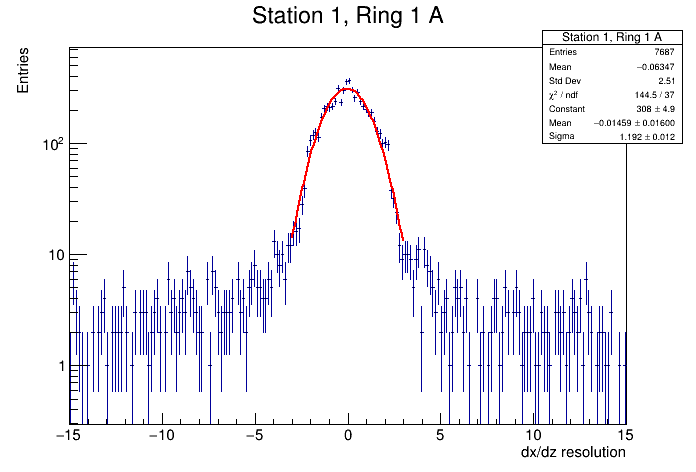

In [62]:
c1 = ROOT.TCanvas()
histo.Draw()
histo.Fit("gaus","","",-3,3)
histo.GetXaxis().SetTitle("dx/dz resolution");
histo.GetYaxis().SetTitle("Entries");
c1.SetLogy()
ROOT.gStyle.SetOptStat();
ROOT.gStyle.SetOptFit()
c1.Draw()

In [ ]:
#posso definire una funzione che presi muoni, segmenti e hits
#sputa fuori un array con le differenze tra direzione sim e reco dei segmenti
#esempio per muone N
'''
def SimSegDirEval(Segments, Hits):
    #N = 3
    for num,segments,hits in zip(ak.num(Segments),Segments,Hits):
        
        ns = num
        print("Number of segments: ",ns)
        sum_n = 0
        i = 0
        for seg in segments:
            i+=1
            #plt.scatter(seg.x,seg.y,s =5.0,label= "Segment "+str(i))
            print("Segmento: ", i)
            print(sum_n)
            
            n = seg.nHits
            print(n)
            print(hits.x[sum_n:sum_n+n])
            #plt.scatter(hits.x[sum_n:sum_n+n],hits_1.y[sum_n:sum_n+n],s =3.0)
            #plt.scatter(hits_1.xSim[N][sum_n:sum_n+n],hits_1.ySim[N][sum_n:sum_n+n],s =3.0)
            sum_n = n + sum_n
            #plt.legend(loc = 'best')
'''